## Load data

In [2]:
import convenience
df_train_val, sample_rates = convenience.load_train()
df_train_val.head()

,file_name,stratify,accent,gender,audio,length
0,1f_1018.wav,1f,1,f,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",3.413312
1,1f_1026.wav,1f,1,f,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",5.632000
2,1f_1031.wav,1f,1,f,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",4.693313
3,1f_1070.wav,1f,1,f,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",3.925312
4,1f_1075.wav,1f,1,f,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",2.737500


## Loop data

In [3]:
import math

target_duration = math.ceil(df_train_val.length.max())
sr = list(sample_rates)[0]

df_train_val, _ = convenience.loop_audio_df(df_train_val, target_duration, sr)
df_train_val.head()

,file_name,stratify,accent,gender,audio,length,looped_audio,looped_length
0,1f_1018.wav,1f,1,f,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",3.413312,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",13.0
1,1f_1026.wav,1f,1,f,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",5.632000,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",13.0
2,1f_1031.wav,1f,1,f,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",4.693313,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",13.0
3,1f_1070.wav,1f,1,f,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",3.925312,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",13.0
4,1f_1075.wav,1f,1,f,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",2.737500,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",13.0


## Normalize data

In [4]:
import torch
df_train_val['audio_norm'] = df_train_val.looped_audio/[torch.max(torch.abs(df_train_val.looped_audio[i])) for i in range(len(df_train_val.looped_audio))]
df_train_val.head()

,file_name,stratify,accent,gender,audio,length,looped_audio,looped_length,audio_norm
0,1f_1018.wav,1f,1,f,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",3.413312,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",13.0,"[tensor(-0.0005), tensor(-0.0001), tensor(-6.7..."
1,1f_1026.wav,1f,1,f,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",5.632000,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",13.0,"[tensor(-0.0012), tensor(-0.0013), tensor(-0.0..."
2,1f_1031.wav,1f,1,f,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",4.693313,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",13.0,"[tensor(-0.0006), tensor(-0.0005), tensor(-0.0..."
3,1f_1070.wav,1f,1,f,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",3.925312,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",13.0,"[tensor(0.0044), tensor(0.0039), tensor(0.0035..."
4,1f_1075.wav,1f,1,f,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",2.737500,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",13.0,"[tensor(0.), tensor(5.7617e-05), tensor(0.), t..."


In [5]:
maxs = [torch.max(torch.abs(df_train_val.audio_norm[i])) for i in range(len(df_train_val.audio_norm))]
mins = [torch.min(torch.abs(df_train_val.audio_norm[i])) for i in range(len(df_train_val.audio_norm))]
means = [torch.sum(torch.abs(df_train_val.audio_norm[i]))/len(df_train_val.audio_norm[i]) for i in range(len(df_train_val.audio_norm))]

print("Maximums")
print("min:\t",min(maxs))
print("max:\t",max(maxs))
print("mean:\t",sum(maxs)/len(maxs))

print("\nMinimums")
print("min:\t",min(mins))
print("max:\t",max(mins))
print("mean:\t",sum(mins)/len(mins))

print("\nMeans")
print("min:\t",min(means))
print("max:\t",max(means))
print("mean:\t",sum(means)/len(means))


Maximums
min:	 tensor(1.)
max:	 tensor(1.)
mean:	 tensor(1.)

Minimums
min:	 tensor(0.)
max:	 tensor(0.)
mean:	 tensor(0.)

Means
min:	 tensor(0.0138)
max:	 tensor(0.1628)
mean:	 tensor(0.0629)


## Split data

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val.stratify)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

Text(0, 0.5, 'Number of samples')

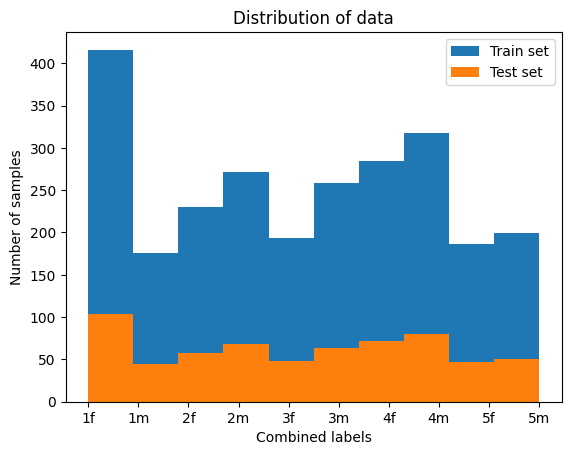

In [7]:
import matplotlib.pyplot as plt

plt.title("Distribution of data")
plt.hist(df_train.sort_values('stratify').stratify)
plt.hist(df_val.sort_values('stratify').stratify)
plt.legend(("Train set", "Test set"))
plt.xlabel("Combined labels")
plt.ylabel("Number of samples")

## Turn audio into spectrograms

In [8]:
display(df_train.head())

,file_name,stratify,accent,gender,audio,length,looped_audio,looped_length,audio_norm
0,1f_6804.wav,1f,1,f,"[tensor(-0.0004), tensor(-0.0007), tensor(-0.0...",5.205312,"[tensor(-0.0004), tensor(-0.0007), tensor(-0.0...",13.0,"[tensor(-0.0009), tensor(-0.0015), tensor(-0.0..."
1,5m_8397.wav,5m,5,m,"[tensor(0.0003), tensor(0.0002), tensor(0.0004...",4.027750,"[tensor(0.0003), tensor(0.0002), tensor(0.0004...",13.0,"[tensor(0.0004), tensor(0.0002), tensor(0.0005..."
2,1f_4170.wav,1f,1,f,"[tensor(-9.1553e-05), tensor(-0.0002), tensor(...",6.656000,"[tensor(-9.1553e-05), tensor(-0.0002), tensor(...",13.0,"[tensor(-0.0002), tensor(-0.0003), tensor(-0.0..."
3,3f_7513.wav,3f,3,f,"[tensor(-0.0005), tensor(-0.0005), tensor(-0.0...",7.167937,"[tensor(-0.0005), tensor(-0.0005), tensor(-0.0...",13.0,"[tensor(-0.0013), tensor(-0.0013), tensor(-0.0..."
4,4m_2278.wav,4m,4,m,"[tensor(0.0002), tensor(0.0002), tensor(0.0002...",9.130625,"[tensor(0.0002), tensor(0.0002), tensor(0.0002...",13.0,"[tensor(0.0003), tensor(0.0002), tensor(0.0002..."


In [9]:
import librosa
import numpy as np
import os

if (not os.path.isdir("preprocessed")): os.mkdir("preprocessed")
if (not os.path.isdir("preprocessed/train")): os.mkdir("preprocessed/train")
if (not os.path.isdir("preprocessed/train/specs")): os.mkdir("preprocessed/train/specs")
if (not os.path.isdir("preprocessed/val")): os.mkdir("preprocessed/val")
if (not os.path.isdir("preprocessed/val/specs")): os.mkdir("preprocessed/val/specs")

labels_csv_out = ""

for i in range(len(df_train.looped_audio)):
    S = librosa.feature.melspectrogram(y=df_train.looped_audio[i].numpy(), sr=16000)
    labels_csv_out += ",".join([f"{df_train.file_name[i][:-4]}.npy", str(df_train.accent[i]),"\n"])
    np.save(f'preprocessed/train/specs/{df_train.file_name[i][:-4]}.npy', S)

with open("preprocessed/train/labels.csv", "w+") as f:
    f.write(labels_csv_out)

labels_csv_out = ""

for i in range(len(df_val.looped_audio)):
    S = librosa.feature.melspectrogram(y=df_val.looped_audio[i].numpy(), sr=16000)
    labels_csv_out += ",".join([f"{df_val.file_name[i][:-4]}.npy", str(df_val.accent[i]), "\n"])
    np.save(f'preprocessed/val/specs/{df_val.file_name[i][:-4]}.npy', S)


with open("preprocessed/val/labels.csv", "w+") as f:
    f.write(labels_csv_out)

In [10]:
librosa.feature.melspectrogram(y=df_train_val.looped_audio[0].numpy(), sr=16000).shape

(128, 407)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

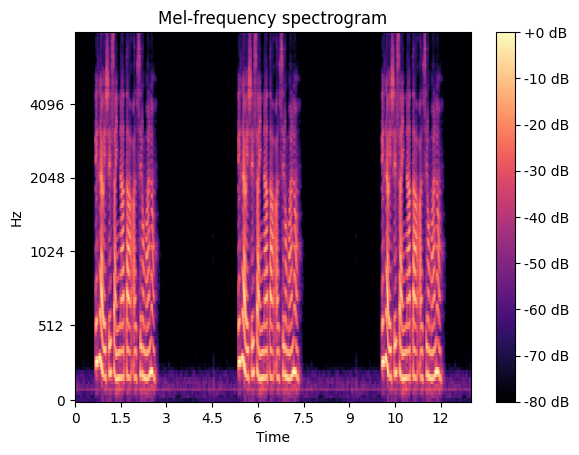

In [12]:
# # Sanity check
import matplotlib.pyplot as plt
import os
S = np.load(f"preprocessed/train/specs/{os.listdir('preprocessed/train/specs')[1]}")
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')